<a href="https://colab.research.google.com/github/mcgovey/kaggle-m5-lstm-predictions-2020/blob/master/M5_Exploration_Loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/My\ Drive/Colab\ Notebooks/kaggle/kaggle.json ~/.kaggle/kaggle.json


In [4]:
!kaggle competitions download -c m5-forecasting-accuracy
!ls -l /content

 77% 11.0M/14.2M [00:00<00:00, 49.1MB/s]
100% 14.2M/14.2M [00:00<00:00, 56.6MB/s]
 82% 13.0M/15.8M [00:00<00:00, 30.9MB/s]
100% 15.8M/15.8M [00:00<00:00, 32.3MB/s]
  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 83.7MB/s]
 90% 14.0M/15.5M [00:00<00:00, 31.9MB/s]
100% 15.5M/15.5M [00:00<00:00, 31.6MB/s]
  0% 0.00/163k [00:00<?, ?B/s]
100% 163k/163k [00:00<00:00, 55.4MB/s]
total 46984
-rw-r--r-- 1 root root   103469 Jun 25 00:00 calendar.csv
drwx------ 4 root root     4096 Jun 25 00:00 drive
-rw-r--r-- 1 root root 16611637 Jun 25 00:00 sales_train_evaluation.csv.zip
-rw-r--r-- 1 root root 16297374 Jun 25 00:00 sales_train_validation.csv.zip
drwxr-xr-x 1 root root     4096 Jun 17 16:18 sample_data
-rw-r--r-- 1 root root   166492 Jun 25 00:00 sample_submission.csv.zip
-rw-r--r-- 1 root root 14916601 Jun 25 00:00 sell_prices.csv.zip


In [7]:
!unzip /content/sales_train_validation.csv.zip
!unzip /content/sales_train_evaluation.csv.zip
!unzip /content/sell_prices.csv.zip

Archive:  /content/sales_train_validation.csv.zip
  inflating: sales_train_validation.csv  
Archive:  /content/sales_train_evaluation.csv.zip
  inflating: sales_train_evaluation.csv  
Archive:  /content/sell_prices.csv.zip
replace sell_prices.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sell_prices.csv         


In [7]:
import numpy as np
import pandas as pd

from math import floor

In [8]:
cal_df = pd.read_csv('calendar.csv')
print(cal_df.shape)
cal_df.head()

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [9]:
sales_df = pd.read_csv('sales_train_validation.csv')
print(sales_df.shape)
sales_df

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,...,1,1,2,0,0,2,0,0,0,2,0,1,1,0,0,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,2,1,1,2,4,3,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3


In [10]:
sell_prices_df = pd.read_csv('sell_prices.csv')
print(sell_prices_df.shape)
sell_prices_df

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [11]:
cal_struct_df = cal_df.drop(['date','wday','d','month','year'], axis=1)
cal_struct_df = cal_struct_df.replace({"'":""," ":""}, regex=True)
cal_struct_df = pd.get_dummies(cal_struct_df.astype(str))
cal_struct_df = cal_struct_df.drop(['event_name_1_nan','event_type_1_nan','event_name_2_nan','event_type_2_nan',
                                   'snap_CA_0','snap_TX_0','snap_WI_0'], axis=1)
cal_struct_df = cal_struct_df.T
cal_struct_df = cal_struct_df.reset_index()
cal_struct_df.columns = ['feature',*cal_df['d']]
cal_struct_df

,feature,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,...,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,wm_yr_wk_11101,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,wm_yr_wk_11102,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,wm_yr_wk_11103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,wm_yr_wk_11104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,wm_yr_wk_11105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,event_type_2_Cultural,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
328,event_type_2_Religious,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
329,snap_CA_1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
330,snap_TX_1,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,...,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,0,0


In [12]:
# add indexes to each data frame
sell_prices_df.set_index('wm_yr_wk', inplace=True)
cal_df_idxed = cal_df.set_index('wm_yr_wk')
sell_prices_df.join(cal_df_idxed, on='wm_yr_wk', how='left')

# if this doesn't work try merge
# pd.merge(cal_df, sell_prices_df, on='wm_yr_wk')

# one-hot encode weekday

# cal_df.pivot()

,store_id,item_id,sell_price,date,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
wm_yr_wk,,,,,,,,,,,,,,,,
11325,CA_1,HOBBIES_1_001,9.58,2013-07-13,Saturday,1,7,2013,d_897,NaN,NaN,NaN,NaN,0,1,0
11325,CA_1,HOBBIES_1_001,9.58,2013-07-14,Sunday,2,7,2013,d_898,NaN,NaN,NaN,NaN,0,0,1
11325,CA_1,HOBBIES_1_001,9.58,2013-07-15,Monday,3,7,2013,d_899,NaN,NaN,NaN,NaN,0,1,1
11325,CA_1,HOBBIES_1_001,9.58,2013-07-16,Tuesday,4,7,2013,d_900,NaN,NaN,NaN,NaN,0,0,0
11325,CA_1,HOBBIES_1_001,9.58,2013-07-17,Wednesday,5,7,2013,d_901,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11620,WI_3,FOODS_3_827,1.00,2016-06-15,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
11620,WI_3,FOODS_3_827,1.00,2016-06-16,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
11620,WI_3,FOODS_3_827,1.00,2016-06-17,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

from keras import models, layers, callbacks, Input

from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [14]:
# function for verifying results
def show_results(model, history):
    #let's get the training and validation histories for plotting
    acc = history.history['mse']
    loss = history.history['loss']
    mse = history.history['mse']
    val_mse = history.history['val_mse']
    mae = history.history['mae']
    val_mae = history.history['val_mae']
    mape = history.history['mape']
    val_mape = history.history['val_mape']

    print(model.summary())
    # let's plot the performance curve
    
    plt.figure();
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 7))
    axes[0].plot(mse, label = 'Train mse')
    axes[0].plot(val_mse, label = 'Test mse')
    axes[1].plot(mae, label='mae')
    axes[1].plot(val_mae, label='Test mae')
    axes[2].plot(mape, label='mape')
    axes[2].plot(val_mape, label='Test mape')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()

    plt.show()

In [15]:
def chunk_data (df, scaler = None, is_test = True, output_labels = True, **kwargs):
    
    from types import SimpleNamespace    

    # reassign the dictionary variables to variables in namespace for easy access
    n = SimpleNamespace(**kwargs)
    np_arr_list, y_arr_list = [], []
    
#     if scaler != None:    
#         if is_test == False:
#             print("shape of df is {}".format(df.shape))
#             df_scaled = scaler.fit_transform(df)
#         else:
#             df_scaled = scaler.transform(df)
#     else:
#         df_scaled = df
            
    # loop through each step and create a new np array to add to list
    for chunk_start in range(n.start, (n.end - n.sample_size + 1), n.step):
        
        # get a chunk of x values and store to array
        print("From {} to {}".format(chunk_start, chunk_start + n.sample_size))
        np_chunk = np.array(df.iloc[:,(chunk_start):(chunk_start + n.sample_size)])
        # add stored array to list
        np_arr_list.append(np_chunk)
        
        if output_labels:
            print("Y samples from {} to {}".format((chunk_start + n.sample_size), (chunk_start + n.sample_size + n.y_size)))
            y_df_chunk = df.iloc[:,(chunk_start + n.sample_size):(chunk_start + n.sample_size + n.y_size)]
            y_np_chunk = np.array(y_df_chunk)
            y_arr_list.append(y_np_chunk)
        
    # stack all the x samples together
    np_stacked_chunks = np.stack(np_arr_list)
    x_reshaped = np.transpose(np_stacked_chunks, (0,2,1))
    
    if output_labels:
        # stack all the y samples together
        y_np_stacked_chunks = np.stack(y_arr_list)
        y_reshaped = y_np_stacked_chunks
        return x_reshaped, y_reshaped
    else:
        return x_reshaped
    

def shape_ts_data(df, sample_size, y_size, test_split = None, val_split = 0, step = 10, scaler = None):
    
    x_start = 0
    if test_split is None:
        x_end = df.shape[1] - y_size  
    elif test_split < 1:
        train_test_split = floor(df.shape[1] * (1 - test_split - val_split))
        test_val_split = floor(df.shape[1] * (1 - val_split))
        print("Split at {} and {}".format(train_test_split, test_val_split))
        x_end = train_test_split - y_size
#         print("x_end: {}".format(x_end))
        # create test variables
        x_test_start = train_test_split
        x_test_end = test_val_split - y_size
        if val_split > 0 and val_split < 1:
            # create validation variables
            x_val_start = test_val_split
            x_val_end = df.shape[1] - y_size
        

    # run the process on the training data
    x_reshaped, y_reshaped = chunk_data(df, is_test = False, scaler = scaler, start = x_start, end = x_end, step = step, sample_size = sample_size, y_size = y_size)
        
    # if data is to be split, then run same process on test data sets
    if test_split is not None:
        print("split here for test range {} to {}".format(x_test_start, x_test_end))
        # get test data
        x_reshaped_test, y_reshaped_test = chunk_data(df, is_test = True, scaler = scaler, start = x_test_start, end = x_test_end, step = step, sample_size = sample_size, y_size = y_size)
        
        if val_split > 0 and val_split < 1:
            print("split here for val range {} to {}".format(x_val_start, x_val_end))
            # create val data sets
            x_reshaped_val, y_reshaped_val = chunk_data(df, is_test = True, scaler = scaler, start = x_val_start, end = x_val_end, step = step, sample_size = sample_size, y_size = y_size)
            return x_reshaped, y_reshaped, x_reshaped_test, y_reshaped_test, x_reshaped_val, y_reshaped_val
        else:
            return x_reshaped, y_reshaped, x_reshaped_test, y_reshaped_test
    else:
        return x_reshaped, y_reshaped

In [16]:
# cal_df
# run for calendar

N_YSTEPS = 28

# x_cal = chunk_data(cal_struct_df, output_labels = False, start = 0, end = cal_struct_df.iloc[:,6:510].shape[1], step = 10, sample_size = 100)
x_cal = chunk_data(cal_struct_df.iloc[:,1:], output_labels = False, start = 0, end = (902 - N_YSTEPS), step = 2, sample_size = 100)
x_cal_test = chunk_data(cal_struct_df.iloc[:,1:], output_labels = False, start = 902, end = (1353 - N_YSTEPS), step = 2, sample_size = 100)
x_cal_val = chunk_data(cal_struct_df.iloc[:,1:], output_labels = False, start = 1353, end = (1510 - N_YSTEPS), step = 2, sample_size = 100)

print('x_cal shape: {}'.format(x_cal.shape))
print('x_cal_test shape: {}'.format(x_cal_test.shape))
print('x_cal_val shape: {}'.format(x_cal_val.shape))

From 0 to 100
From 2 to 102
From 4 to 104
From 6 to 106
From 8 to 108
From 10 to 110
From 12 to 112
From 14 to 114
From 16 to 116
From 18 to 118
From 20 to 120
From 22 to 122
From 24 to 124
From 26 to 126
From 28 to 128
From 30 to 130
From 32 to 132
From 34 to 134
From 36 to 136
From 38 to 138
From 40 to 140
From 42 to 142
From 44 to 144
From 46 to 146
From 48 to 148
From 50 to 150
From 52 to 152
From 54 to 154
From 56 to 156
From 58 to 158
From 60 to 160
From 62 to 162
From 64 to 164
From 66 to 166
From 68 to 168
From 70 to 170
From 72 to 172
From 74 to 174
From 76 to 176
From 78 to 178
From 80 to 180
From 82 to 182
From 84 to 184
From 86 to 186
From 88 to 188
From 90 to 190
From 92 to 192
From 94 to 194
From 96 to 196
From 98 to 198
From 100 to 200
From 102 to 202
From 104 to 204
From 106 to 206
From 108 to 208
From 110 to 210
From 112 to 212
From 114 to 214
From 116 to 216
From 118 to 218
From 120 to 220
From 122 to 222
From 124 to 224
From 126 to 226
From 128 to 228
From 130 to 230

In [17]:
x_cal.shape

(388, 100, 332)

In [18]:

floor(sales_df.iloc[[3,7,15,22],6:].shape[1] * 0.8)
# 1530 for x
# 383 for y

1530

In [31]:
# set features for testing
# features = [3,7,15,22]
import random
features = []
random.seed(100)
for x in range(10000):
  features.append(random.randint(1,sales_df.shape[0]-1))
# features = [i for i in range(10000)]
n_features = len(features)

# set features for full run
# n_features = sales_df.shape[0]
n_features

10000

In [32]:
max(features)

30487

In [33]:
sales_df.shape[0]

30490

In [34]:
sales_df.iloc[features,6:1510]

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1465,d_1466,d_1467,d_1468,d_1469,d_1470,d_1471,d_1472,d_1473,d_1474,d_1475,d_1476,d_1477,d_1478,d_1479,d_1480,d_1481,d_1482,d_1483,d_1484,d_1485,d_1486,d_1487,d_1488,d_1489,d_1490,d_1491,d_1492,d_1493,d_1494,d_1495,d_1496,d_1497,d_1498,d_1499,d_1500,d_1501,d_1502,d_1503,d_1504
4774,2,3,0,0,5,6,2,2,1,7,0,3,3,1,0,5,1,0,4,5,6,6,3,5,8,14,3,5,4,9,2,1,6,1,10,7,2,0,0,0,...,2,0,2,0,1,0,3,8,0,1,1,0,2,0,1,6,0,0,0,2,1,2,0,1,0,1,2,10,2,0,2,1,3,0,4,2,2,2,0,0
15058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,5,2,0,2,1,0,0,1,2,3,2,1,4,2,1,3,2,1,0,2,0,1,1,2,1,0,2,1,2,1,1,3,2,1,4,2,0,0
14908,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,3,2,0,0,3,3,4,0,2,3,0,0,1,1,1,6,3,1,3,0,1,4,3,0,0,0,1,1,1,2,3,1,1,0,0,2,0,2
25258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,0,4,9,2,1,2,4,4,0,1,0,0,3,6,1,1,1,1,0,0,0,2,1,0,5,1,0,1,0,2,0,0,0,0,0
15831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,0,0,0,2,2,0,1,0,0,4,2,2,0,1,0,0,0,0,3,0,2,0,1,0,0,0,0,0,0,0,0,0,0,3,0,2
26546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,1,2,3,1,1,1,0,0,0,0,0,2,0,1,0
11442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,0,2,2,5,2,6,5,1,2,2,1,2,2,1,2,1,1,2,4,2,5,0,3,4,2,3,1,1,0,1,1,0,6,6,1,4,2


In [35]:
# scaler = MinMaxScaler()

x_train, y_train, x_test, y_test, x_val, y_val = shape_ts_data(sales_df.iloc[features,6:1510], sample_size=100, step=2, y_size=N_YSTEPS, test_split = 0.3, val_split = 0.1) #, scaler = scaler
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))
print('x_val shape: {}'.format(x_val.shape))
print('y_val shape: {}'.format(y_val.shape))
x_train[0]

Split at 902 and 1353
From 0 to 100
Y samples from 100 to 128
From 2 to 102
Y samples from 102 to 130
From 4 to 104
Y samples from 104 to 132
From 6 to 106
Y samples from 106 to 134
From 8 to 108
Y samples from 108 to 136
From 10 to 110
Y samples from 110 to 138
From 12 to 112
Y samples from 112 to 140
From 14 to 114
Y samples from 114 to 142
From 16 to 116
Y samples from 116 to 144
From 18 to 118
Y samples from 118 to 146
From 20 to 120
Y samples from 120 to 148
From 22 to 122
Y samples from 122 to 150
From 24 to 124
Y samples from 124 to 152
From 26 to 126
Y samples from 126 to 154
From 28 to 128
Y samples from 128 to 156
From 30 to 130
Y samples from 130 to 158
From 32 to 132
Y samples from 132 to 160
From 34 to 134
Y samples from 134 to 162
From 36 to 136
Y samples from 136 to 164
From 38 to 138
Y samples from 138 to 166
From 40 to 140
Y samples from 140 to 168
From 42 to 142
Y samples from 142 to 170
From 44 to 144
Y samples from 144 to 172
From 46 to 146
Y samples from 146 to 174

array([[ 2,  0,  0, ...,  0,  0, 26],
       [ 3,  0,  0, ...,  0,  0,  3],
       [ 0,  0,  0, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ...,  0,  0,  3],
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  1]])

In [36]:
y_train.shape

(388, 10000, 28)

In [37]:
# the first time period y values
y_train[:,:,0]

array([[ 6,  0,  0, ...,  0,  0,  0],
       [ 5,  0,  0, ...,  0,  0,  5],
       [ 2,  0,  0, ...,  0,  0, 12],
       ...,
       [ 3,  5,  1, ...,  0,  2,  2],
       [ 3,  1,  0, ...,  0,  3,  1],
       [ 2,  2,  6, ...,  0,  3,  0]])

In [38]:
y_train[:,:,0]

# how to stack along feature dimension (which contains the different time steps)
np.stack([y_train[:,:,0],y_train[:,:,1]], axis = 2)

array([[[ 6,  7],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 0,  0],
        [ 0,  0],
        [ 0,  0]],

       [[ 5,  1],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 0,  0],
        [ 0,  0],
        [ 5,  0]],

       [[ 2,  5],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 0,  0],
        [ 0,  0],
        [12,  1]],

       ...,

       [[ 3,  3],
        [ 5,  1],
        [ 1,  2],
        ...,
        [ 0,  0],
        [ 2,  2],
        [ 2,  0]],

       [[ 3,  3],
        [ 1,  3],
        [ 0,  1],
        ...,
        [ 0,  0],
        [ 3,  0],
        [ 1,  0]],

       [[ 2,  2],
        [ 2,  2],
        [ 6,  1],
        ...,
        [ 0,  0],
        [ 3,  3],
        [ 0,  3]]])

## Build the model

In [39]:
# set input shape to be used in model build
input_shape = x_train.shape[1:3]
print('base input shape: {}'.format(input_shape))
cal_shape = x_cal.shape[1:3]
print('cal input shape: {}'.format(cal_shape))

base input shape: (100, 10000)
cal input shape: (100, 332)


In [40]:
calendar_input = Input(shape = cal_shape, dtype='float32', name = 'cal_input')

In [41]:
timeseries_input = Input(shape=input_shape, dtype='float32', name='timeseries')

In [42]:
# try LSTM layers
# ts_layer = layers.Conv1D(filters=64, 
#                          kernel_size=3,
#                          padding='same',
#                          activation='relu')(timeseries_input)
ts_layer = layers.LSTM(units=64, 
                       recurrent_dropout = 0.3,
                      return_sequences = True)(timeseries_input)
ts_layer = layers.LSTM(units=64,
                       recurrent_dropout = 0.3)(timeseries_input)
# ts_layer = layers.MaxPooling1D(pool_size=2)(ts_layer)
# ts_layer = layers.Flatten()(ts_layer)

In [43]:
cal_layer = layers.Conv1D(filters=64, 
                         kernel_size=3,
                         padding='same',
                         activation='relu')(calendar_input)
cal_layer = layers.MaxPooling1D(pool_size=2)(cal_layer)
cal_layer = layers.Flatten()(cal_layer)

In [44]:
x = layers.concatenate([ts_layer, cal_layer])
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)

In [45]:
output = layers.Dense(n_features * N_YSTEPS, activation=None)(x)
output = layers.Reshape((n_features, N_YSTEPS))(output)

In [46]:
model = models.Model([timeseries_input, calendar_input], output)

In [47]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mse', 'mae', 'mape'])

In [48]:
history = model.fit([x_train, x_cal], 
                        y_train,
                        validation_data = ([x_test, x_cal_test], y_test),
                        steps_per_epoch=5,
                        validation_steps = 20,
                        epochs=100,
                        callbacks=[
                            callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=1, mode='auto', restore_best_weights=True),
                            callbacks.ModelCheckpoint(filepath='training_weights.h5', monitor='loss',save_best_only=True)
                        ],
                        verbose=1)

Train on 388 samples, validate on 162 samples
Epoch 1/100
5/5 [==============================] - 25s 5s/step - loss: 14.2896 - mse: 14.2896 - mae: 1.0067 - mape: 8998278.0000 - val_loss: 0.6913 - val_mse: 276.5097 - val_mae: 23.0813 - val_mape: 731847296.0000
Epoch 2/100
5/5 [==============================] - 17s 3s/step - loss: 13.2770 - mse: 13.2770 - mae: 1.0292 - mape: 150146272.0000 - val_loss: 0.6001 - val_mse: 240.0451 - val_mae: 23.7808 - val_mape: 6479395136.0000
Epoch 3/100
5/5 [==============================] - 17s 3s/step - loss: 10.9434 - mse: 10.9434 - mae: 1.1612 - mape: 506827520.0000 - val_loss: 0.5068 - val_mse: 202.7099 - val_mae: 24.4641 - val_mape: 8227235872.0000
Epoch 4/100
5/5 [==============================] - 17s 3s/step - loss: 9.0753 - mse: 9.0753 - mae: 1.0738 - mape: 415095200.0000 - val_loss: 0.4632 - val_mse: 185.2774 - val_mae: 21.7537 - val_mape: 4676526000.0000
Epoch 5/100
5/5 [==============================] - 17s 3s/step - loss: 7.9939 - mse: 7.9939

## Evaluate Results

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cal_input (InputLayer)          (None, 100, 332)     0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 100, 64)      63808       cal_input[0][0]                  
__________________________________________________________________________________________________
timeseries (InputLayer)         (None, 100, 10000)   0                                            
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 50, 64)       0           conv1d_1[0][0]                   
____________________________________________________________________________________________

<Figure size 432x288 with 0 Axes>

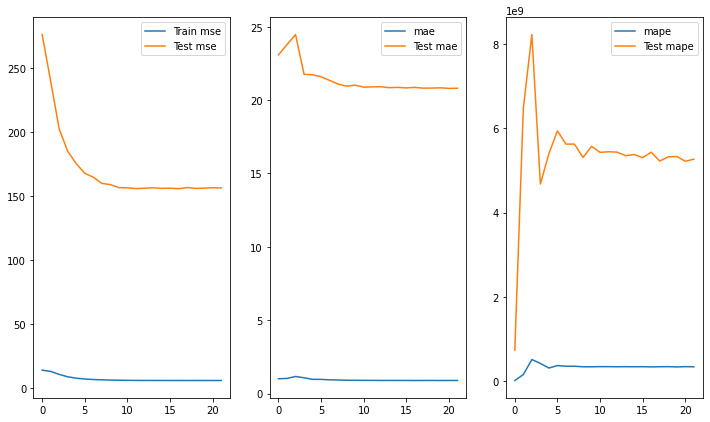

In [52]:
show_results(model, history);

In [ ]:
# x_test = sales_df.iloc[[3,7,15,22],206:306]
# x_test = np.array(x_test)
# x_test = x_test.reshape(1, x_test.shape[1], x_test.shape[0])
# x_test

# y_test = np.array(sales_df.iloc[[3,7,15,22],306:308])
# y_test = y_test.reshape(1, y_test.shape[0] * y_test.shape[1])
# y_test

In [53]:
score = model.evaluate([x_val, x_cal_val], 
                       y_val,
                       verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(score)

ValueError: ignored

In [55]:
def reshape_pred_lists (pred_list, column_name, date_first=True):
    # reshape data
    pred_list = np.asarray(pred_list)
    pred_list = np.stack(pred_list)
    if pred_list.ndim == 3:
        pred_list = pd.DataFrame(pred_list[0,:,:])
    else:
        pred_list = pd.DataFrame(pred_list)
    pred_list = pd.DataFrame(pred_list.T)
    
    pred_list = pd.DataFrame(pred_list.stack())
    pred_list.reset_index(inplace=True)
    if date_first == True:
        pred_list.columns = ['SKU_idx', 'DATE_idx', column_name]
    else:
        pred_list.columns = ['DATE_idx', 'SKU_idx', column_name]
        
    # rescale and exponentiate the data
    # pred_list.loc[:,column_name] = scaler.inverse_transform(pd.DataFrame(pred_list.loc[:,column_name]))
    # pred_list.loc[:,column_name] = pred_list.loc[:,column_name].apply(np.exp)
    # pred_list.loc[:,column_name] = pred_list.loc[:,column_name].fillna(0)
    
    return pred_list

def train_predictions (x_values, y_values, model):
    pred_list = []
    actual_list = y_values[:,:,0]
    
    # predict future weeks
    pred_list = train_iterative_preds(x_values, model)
    
    print('train predict {} and actual shape {}'.format(np.asarray(pred_list)[:,:,0].shape, np.asarray(actual_list).shape))

    pred_list = reshape_pred_lists(np.asarray(pred_list)[:,:,0], 'preds', date_first=True)
    actual_list = reshape_pred_lists(actual_list, 'actuals', date_first=True)

    return pred_list, actual_list

def train_iterative_preds (x_train, model):
    pred_list2 = []

    if isinstance(x_train,(list)):
        for i in range(x_train[0].shape[0]):
            batch = x_train[0][i,:,:].reshape(1, x_train[0].shape[1], x_train[0].shape[2])
            batch2 = x_train[1][i,:,:].reshape(1, x_train[1].shape[1], x_train[1].shape[2])
            pred_list2.append(model.predict([batch, batch2])[0])
    else:
        for i in range(x_train.shape[0]):
            batch = x_train[i,:,:].reshape(1, x_train.shape[1], x_train.shape[2])
        #     print("predicting for {}".format(batch))
            pred_list2.append(model.predict(batch)[0])
        #     print("predicted {}".format(model.predict(batch)))

#     np.asarray(pred_list2).shape
#     pred_list2 = reshape_pred_lists(np.asarray(pred_list2)[:,:,0], 'preds')
    
    return pred_list2

In [56]:
y_train_pred, y_train_actual = train_predictions([x_train, x_cal], y_train, model)

y_train_actual

train predict (388, 10000) and actual shape (388, 10000)


,SKU_idx,DATE_idx,actuals
0,0,0,6
1,0,1,5
2,0,2,2
3,0,3,9
4,0,4,0
...,...,...,...
3879995,9999,383,0
3879996,9999,384,1
3879997,9999,385,2
3879998,9999,386,1


In [57]:
y_train_pred

,SKU_idx,DATE_idx,preds
0,0,0,1.241247
1,0,1,1.268872
2,0,2,1.288577
3,0,3,1.292717
4,0,4,1.310457
...,...,...,...
3879995,9999,383,2.624066
3879996,9999,384,2.640792
3879997,9999,385,2.660409
3879998,9999,386,2.685398


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


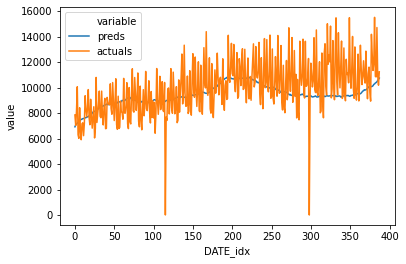

In [59]:
y_train_merged = pd.merge(y_train_pred, y_train_actual, on=['SKU_idx', 'DATE_idx'])

# generate chart for training data
y_train_pred_agg = y_train_merged.groupby(['DATE_idx'])['preds','actuals'].sum()
y_train_pred_agg.reset_index(inplace=True)

#output plot
sns.lineplot(x='DATE_idx', y='value', hue='variable', data = pd.melt(y_train_pred_agg, ['DATE_idx']));

In [75]:
x_val_predictions = model.predict([x_val, x_cal_val])
x_val_predictions.shape

(12, 1000, 28)

In [ ]:
# scaler.inverse_transform(y_test[:,:,-1])
y_test[:,:,-1].shape
# scaler.get_params

(3, 1000, 28)

In [ ]:
# prediction engine for future
# copy the x_test array to be used for future looking predictions
x_test_latest = np.array(x_val, copy = True)

# will need a similar method for calendar

# capture the shape of the x_test array to be used in loops
num_y_vals = x_test.shape[1]

# loop through 28 days of predictions and split into individual days to make restacking easier
for j in range(0, 29):
    x_test_array_split = []
    for i in range(1, num_y_vals + 1):
        if i >= num_y_vals:
            print("last prediction {} for {} run".format(i,j))
            x_test_array_split.append(model.predict(x_test_latest))
        else:
            x_test_array_split.append(x_test_latest[:,i,:])
    x_test_latest = np.stack(x_test_array_split, axis = 1)

last prediction 100 for 0 run
last prediction 100 for 1 run
last prediction 100 for 2 run
last prediction 100 for 3 run
last prediction 100 for 4 run
last prediction 100 for 5 run
last prediction 100 for 6 run
last prediction 100 for 7 run
last prediction 100 for 8 run
last prediction 100 for 9 run
last prediction 100 for 10 run
last prediction 100 for 11 run
last prediction 100 for 12 run
last prediction 100 for 13 run
last prediction 100 for 14 run
last prediction 100 for 15 run
last prediction 100 for 16 run
last prediction 100 for 17 run
last prediction 100 for 18 run
last prediction 100 for 19 run
last prediction 100 for 20 run
last prediction 100 for 21 run
last prediction 100 for 22 run
last prediction 100 for 23 run
last prediction 100 for 24 run
last prediction 100 for 25 run
last prediction 100 for 26 run
last prediction 100 for 27 run
last prediction 100 for 28 run


In [ ]:
x_test_latest.shape

(3, 100, 1000)

In [ ]:
y_test_predictions = np.transpose(x_test_latest[:,-29:-1,:], (0,2,1))

In [ ]:
y_test_predictions.shape

(3, 1000, 28)

In [ ]:
# get only last sample for the latest predictions
y_test[-1,:,:]

array([[ 0,  0,  0, ...,  2,  9,  8],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  2, ...,  1,  1,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 7, 10,  9, ...,  0, 33, 32],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [ ]:
y_test.shape

(3, 1000, 28)

In [ ]:
(np.square(y_test_predictions - y_test)).mean(axis=None)

15.800670769198565

In [ ]:
x_test_latest[:,-1,:]

array([[ 2.80064821,  1.54865956,  3.31406593,  2.25108767],
       [ 2.06400418, -0.61296386,  4.54324722,  4.46978474]])